* MODELS

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lightgbm import (
    LGBMRegressor, 
    LGBMClassifier
)
from sklearn.ensemble import (
    RandomForestRegressor, 
    RandomForestClassifier
)
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression, 
    Lasso, 
    Ridge
)
from sklearn.model_selection import (
    KFold, 
    GridSearchCV, 
    train_test_split, 
    cross_val_score
)
from sklearn.metrics import (
    mean_squared_error, 
    make_scorer, 
    mean_squared_log_error, 
    accuracy_score, 
    precision_recall_curve,
    PrecisionRecallDisplay
)
from sklearn.neighbors import (
    KNeighborsRegressor, 
    KNeighborsClassifier
)
from sklearn.pipeline import (
    Pipeline
)
from sklearn.preprocessing import (
    FunctionTransformer, 
    StandardScaler
)
from sklearn.svm import (
    SVR, 
    SVC
)



In [33]:
df = pd.read_csv('data/data_numbers_dummis.csv')

* CLASIFICATION
1. Regresión logística
2. Support Vector Machine (SVM)
3. Random Forest
4. LGBM o XGBoost 
5. Knn

* Metrics
    - accuracy
    - pression
    - recall
    - F1-score
    - auc de roc curve


In [35]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [36]:
df.shape[0]*0.8

3927.2000000000003

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
y_test.value_counts(normalize=True) * 100

0    95.112016
1     4.887984
Name: stroke, dtype: float64

* Logistic Regression

In [39]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,31112,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
2,60182,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
3,1665,79.0,1,0,1,1,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,56669,81.0,0,0,1,0,186.21,29.0,1,0,1,0,0,0,1,0,0,0,1,0,0


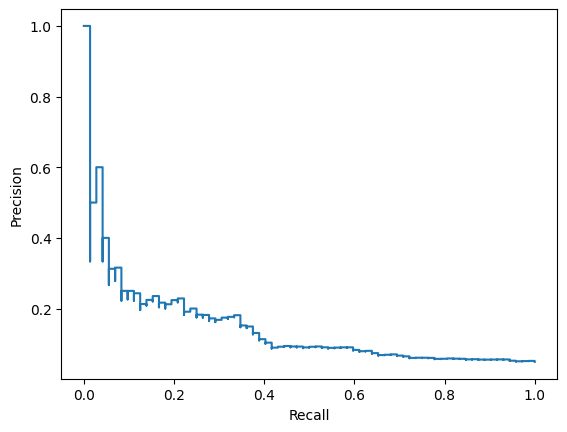

In [58]:
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)

y_pred_Logistic = Logistic.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_Logistic)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

* Random forest

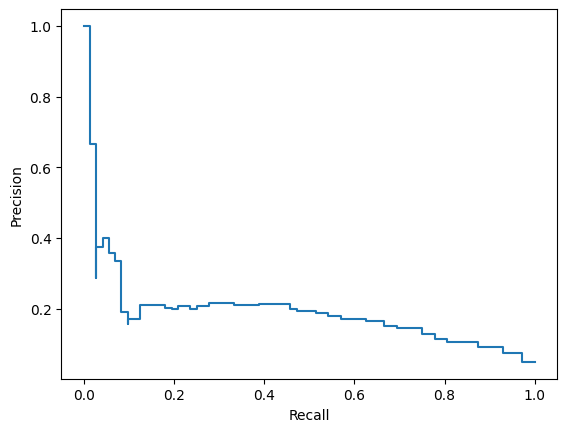

In [57]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train.values.ravel())

y_pred_RF = RF.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_RF)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [53]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [48]:
y_pred_RF.sum()

0

* LGBM 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 3436, number of used features: 18
[LightGBM] [Info] Start training from score 0.039872


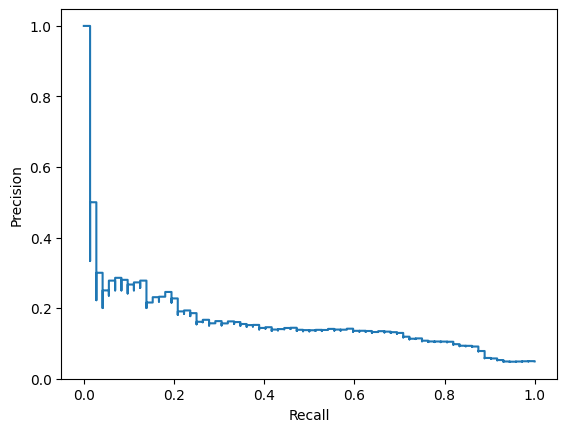

In [44]:
LGBM = LGBMRegressor()
LGBM.fit(X_train, y_train)

y_pred_LGBM = LGBM.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_LGBM)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [59]:
(y_pred_RF > 0.5).sum()

0

In [60]:
y_pred_RF.max()

0.45

In [62]:
sorted(y_pred_RF, reverse=True)

[0.45,
 0.43,
 0.43,
 0.42,
 0.4,
 0.4,
 0.4,
 0.36,
 0.33,
 0.33,
 0.32,
 0.32,
 0.32,
 0.32,
 0.31,
 0.31,
 0.31,
 0.31,
 0.3,
 0.29,
 0.29,
 0.29,
 0.29,
 0.28,
 0.28,
 0.28,
 0.28,
 0.28,
 0.27,
 0.27,
 0.27,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.24,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.22,
 0.22,
 0.22,
 0.22,
 0.22,
 0.22,
 0.22,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.21,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.19,
 0.19,
 0.19,
 0.19,
 0.19,
 0.19,
 0.19,
 0.19,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.17,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.15,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0